In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
print(f"X_train shape : {X_train.shape} \ny_train shape : {y_train.shape} \nX_test shape : {X_test.shape} \ny_test shape : {y_test.shape}")

X_train shape : (50000, 32, 32, 3) 
y_train shape : (50000, 1) 
X_test shape : (10000, 32, 32, 3) 
y_test shape : (10000, 1)


In [12]:
# Number of images in the dataset
num_train_images = X_train.shape[0]
num_test_images = X_test.shape[0]
print("Number of training images:", num_train_images)
print("Number of test images:", num_test_images)

Number of training images: 50000
Number of test images: 10000


In [14]:
# Image dimensions
image_height, image_width, num_channels = X_train.shape[1:]
print("Image dimensions: {}x{}x{}".format(image_height, image_width, num_channels))

Image dimensions: 32x32x3


In [15]:
# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


In [16]:
# Class distribution
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique_classes, class_counts))
print("Class distribution:")
for class_label, count in class_distribution.items():
    print("Class {}: {} images".format(class_label, count))

Class distribution:
Class 0: 5000 images
Class 1: 5000 images
Class 2: 5000 images
Class 3: 5000 images
Class 4: 5000 images
Class 5: 5000 images
Class 6: 5000 images
Class 7: 5000 images
Class 8: 5000 images
Class 9: 5000 images


In [18]:
missing_data_count = np.sum(np.isnan(X_train))
print("Missing data count in train data:", missing_data_count)

Missing data count: 0


In [21]:
# Numerical statistics of pixel values
pixel_min = np.min(X_train)
pixel_max = np.max(X_train)
pixel_mean = np.mean(X_train)
pixel_std = np.std(X_train)

print("Pixel value statistics in train data:")
print("Min:", pixel_min)
print("Max:", pixel_max)
print("Mean:", pixel_mean)
print("Standard Deviation:", pixel_std)

Pixel value statistics in train data:
Min: 0
Max: 255
Mean: 120.70756512369792
Standard Deviation: 64.1500758911213


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']        #from cifar description website

automobile


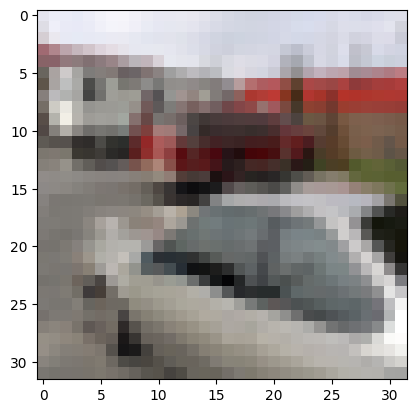

In [ ]:
plt.imshow(X_train[-1,0:])
print(labels[y_train[-1][0]])


<ipython-input-6-f15443916369>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


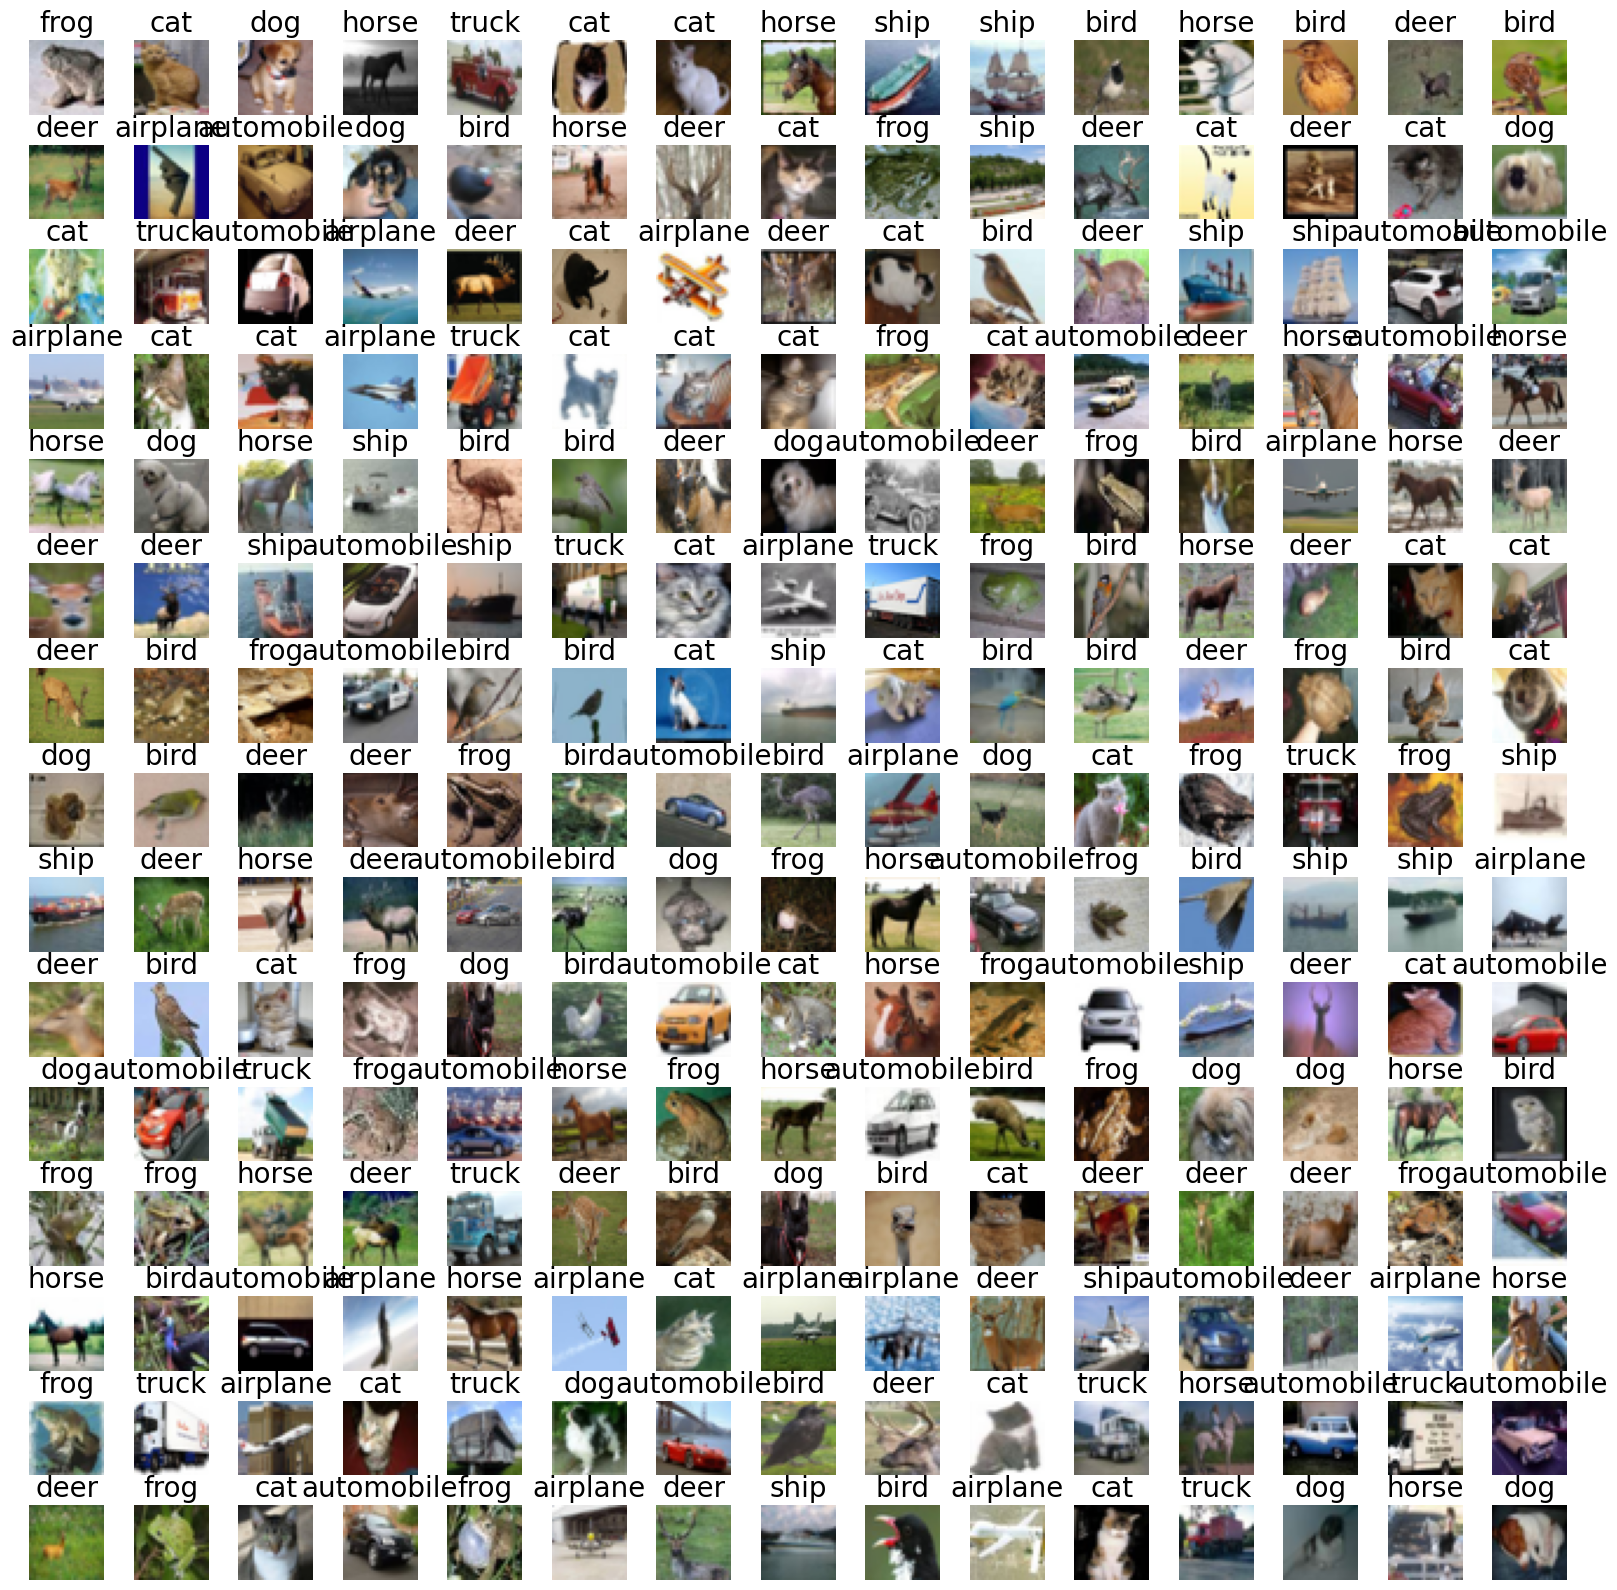

In [ ]:
fig, axes = plt.subplots(15, 15, figsize = (20,20))
axes = axes.ravel()
n_train = len(X_train)
for i in np.arange(0, 225):

    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,0:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


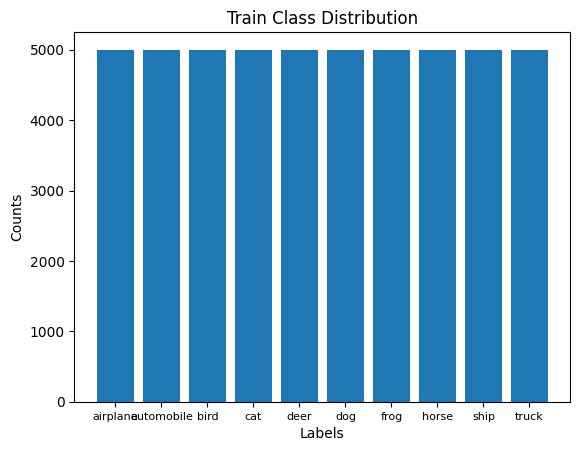

In [ ]:
_,counts = np.unique(y_train,return_counts = True)
print(labels,counts)
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Train Class Distribution')
plt.xticks(labels, fontsize=8)
plt.show()

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


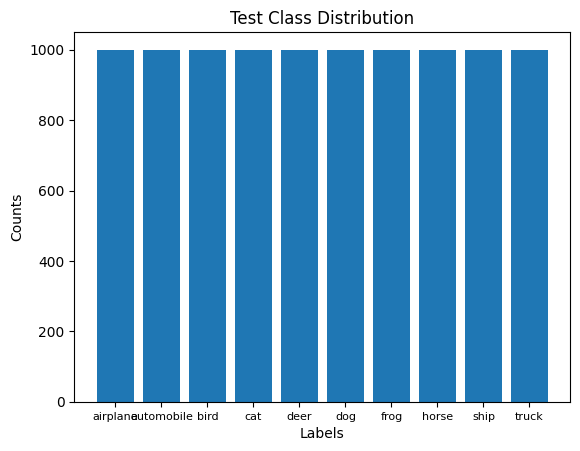

In [ ]:
_,counts = np.unique(y_test,return_counts = True)
print(labels,counts)
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Test Class Distribution')
plt.xticks(labels, fontsize=8)
plt.show()

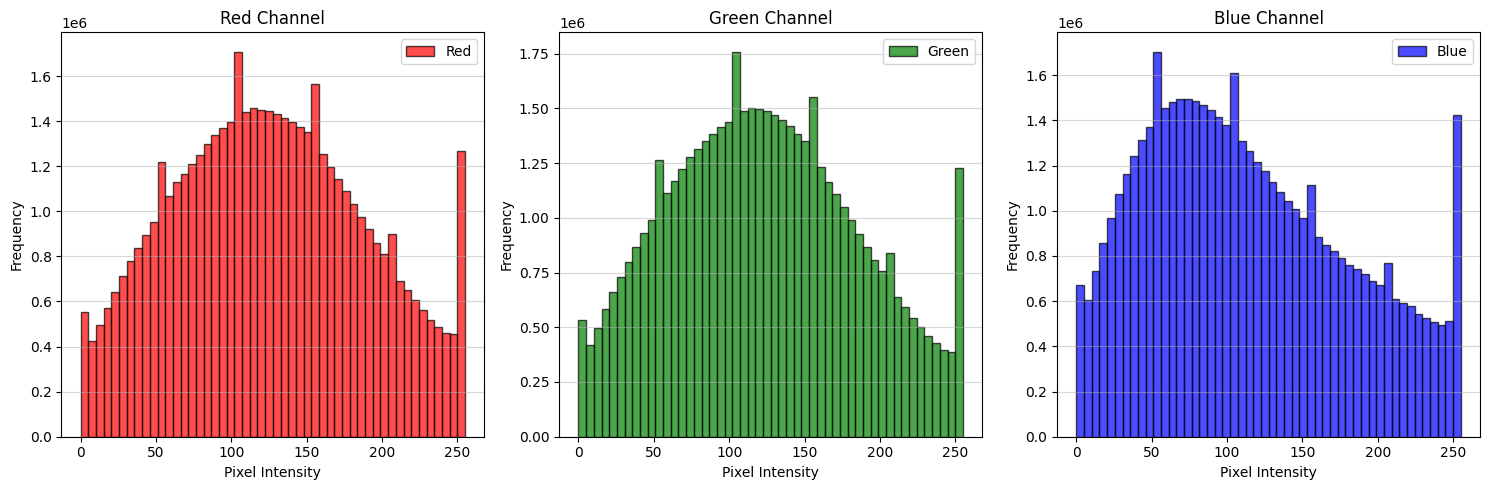

In [ ]:
# Display pixel intensity distribution for each RGB channel using subplots
plt.figure(figsize=(15, 5))

# Subplot for Red channel
plt.subplot(1, 3, 1)
plt.hist(X_train[..., 0].flatten(), bins=50, color='r', alpha=0.7, label='Red', edgecolor='black')
plt.title('Red Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)

# Subplot for Green channel
plt.subplot(1, 3, 2)
plt.hist(X_train[..., 1].flatten(), bins=50, color='g', alpha=0.7, label='Green', edgecolor='black')
plt.title('Green Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)

# Subplot for Blue channel
plt.subplot(1, 3, 3)
plt.hist(X_train[..., 2].flatten(), bins=50, color='b', alpha=0.7, label='Blue', edgecolor='black')
plt.title('Blue Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()
